In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
from sklearn import linear_model
import seaborn as sns

In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

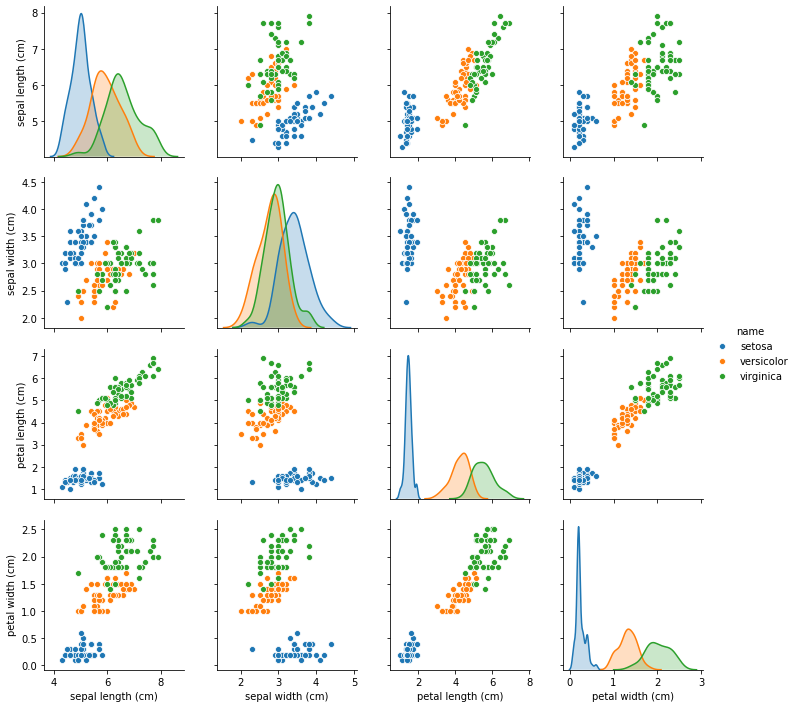

In [3]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]],
    hue = 'name'
)

In [4]:
A = iris_frame.iloc[:,:4]
#A
U, s, W = np.linalg.svd(A)
# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица U размер:{U.shape} :\n{U}')
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')
print(f'Матрица V размер:{V.shape} :\n{V}')

Матрица U размер:(150, 150) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
Матрица Sigma размер:(150, 4) :
[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         

In [6]:
n_elements = 3
Sigma = Sigma[:, :n_elements]

V = V[:,:n_elements]
# reconstruct
B = U.dot(Sigma.dot(V.T))
print(B)

U, s, W = np.linalg.svd(B)
# Транспонируем матрицу W
V = W.T

Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')

[[5.09900942 3.50097959 1.4014844  0.19767844]
 [4.86870364 3.03094925 1.44689807 0.12665275]
 [4.69422107 3.20571484 1.30865982 0.18645629]
 [4.62518119 3.0750981  1.4622656  0.25901553]
 [5.01947963 3.58073643 1.37080948 0.24565314]
 [5.40687172 3.89320449 1.68970262 0.41610481]
 [4.61617117 3.38400818 1.37576725 0.33789933]
 [5.01454656 3.38561478 1.47820176 0.23409183]
 [4.40998651 2.89012425 1.38503506 0.22340474]
 [4.91842577 3.08177859 1.4723887  0.14318329]
 [5.40391192 3.69613146 1.49413792 0.20916813]
 [4.8505539  3.3500068  1.5242442  0.31847992]
 [4.80311694 2.99691763 1.39532922 0.10730496]
 [4.30830887 2.99178329 1.08754903 0.11947296]
 [5.74700833 4.05240393 1.27940883 0.07580684]
 [5.69603935 4.40391672 1.5059351  0.39071768]
 [5.34517978 3.95421221 1.38214894 0.27152138]
 [5.07488831 3.52483318 1.43763026 0.24114734]
 [5.68993828 3.80995013 1.71507765 0.27641899]
 [5.12084537 3.77938583 1.46876289 0.34885395]
 [5.40422382 3.39582303 1.69367054 0.20989909]
 [5.08654623 

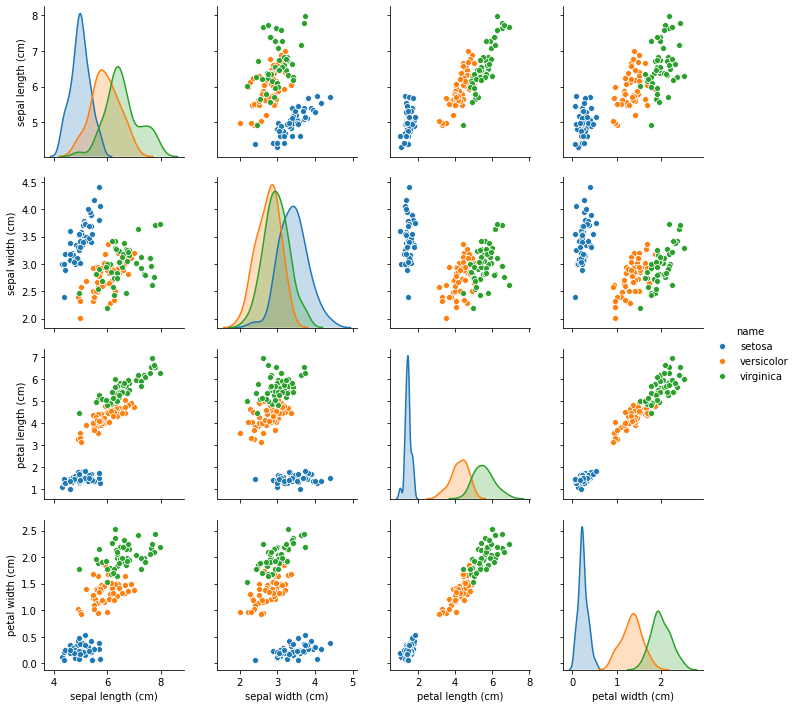

In [46]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]], 
    hue = 'name'
)

In [47]:
B_cov = B.T @ B
print(f'Ковариационная матрица:\n{B_cov}')
U_cov, s_cov, VT_cov = np.linalg.svd(B_cov)
print(f'Собственные значения:\n{s_cov}')
print(f'Собственные векторы:\n{U_cov}')


Ковариационная матрица:
[[5223.48436313 2673.79158155 3484.30791244 1127.28308048]
 [2673.79158155 1430.04242879 1673.75816452  532.73741533]
 [3484.30791244 1673.75816452 2581.88894483  870.39410701]
 [1127.28308048  532.73741533  870.39410701  300.32169304]]
Собственные значения:
[9.20830507e+03 3.15454317e+02 1.19780429e+01 4.49836905e-14]
Собственные векторы:
[[-0.75110816 -0.2841749   0.50215472  0.32081425]
 [-0.38008617 -0.5467445  -0.67524332 -0.31725607]
 [-0.51300886  0.70866455 -0.05916621 -0.48074507]
 [-0.16790754  0.34367081 -0.53701625  0.75187165]]


In [48]:
C = W.dot(B.T).T
C2 = VT_cov.dot(B.T).T

print(f'Матрица признаков C в новом базисе:\n{C}')
print(f'Матрица признаков C2 в новом базисе:\n{C2}')

Матрица признаков C в новом базисе:
[[-5.91274714e+00  2.30203322e+00  7.40153559e-03 -9.45420622e-16]
 [-5.57248242e+00  1.97182599e+00  2.44592251e-01 -6.57790085e-16]
 [-5.44697714e+00  2.09520636e+00  1.50292625e-02 -4.72502031e-16]
 [-5.43645948e+00  1.87038151e+00  2.05048805e-02 -3.61904322e-16]
 [-5.87564494e+00  2.32829018e+00 -1.10338269e-01 -5.39627958e-16]
 [-6.47759822e+00  2.32464996e+00 -2.37202487e-01 -8.11987756e-16]
 [-5.51597520e+00  2.07090423e+00 -2.29853120e-01 -5.42450762e-16]
 [-5.85092859e+00  2.14807482e+00  1.87937744e-02 -7.78332938e-16]
 [-5.15891972e+00  1.77506408e+00  6.10392203e-02 -4.32636322e-16]
 [-5.64500117e+00  1.99000106e+00  2.24852923e-01 -5.14319496e-16]
 [-6.26539771e+00  2.42576813e+00  1.70826682e-02 -5.56175520e-16]
 [-5.75200785e+00  2.02037338e+00 -8.75537913e-02 -4.84789512e-16]
 [-5.48058085e+00  1.97777558e+00  2.48078403e-01 -3.61304213e-16]
 [-4.95112411e+00  2.04828749e+00  1.47509030e-02 -3.41406650e-16]
 [-6.52596417e+00  2.91606